In [ ]:
# STEP 1: IMPORT TOOLS AND LOAD DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset 
df = pd.read_csv('SOCR-HeightWeight.csv')

# Let's see what the first few rows look like
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [ ]:
# STEP 2: CALCULATING PARAMETERS MANUALLY 
# We extract the heights (x) and weights (y)
x = df['Height(Inches)'].values
y = df['Weight(Pounds)'].values
n = len(x)

# 1. Calculate Averages (Mean)
mu_x = sum(x) / n
mu_y = sum(y) / n

# 2. Calculate Standard Deviation (Spread)
# Formula: sqrt( sum( (val - average)^2 ) / n )
std_x = (sum((x - mu_x)**2) / n)**0.5
std_y = (sum((y - mu_y)**2) / n)**0.5

# 3. Calculate Correlation Coefficient (Rho)
# This tells us how much height and weight are linked
covariance = sum((x - mu_x) * (y - mu_y)) / n
rho = covariance / (std_x * std_y)

print(f"Manual Parameters Calculated:")
print(f"Mean Height: {mu_x:.4f}, Mean Weight: {mu_y:.4f}")
print(f"Correlation (Rho): {rho:.4f}")

Manual Parameters Calculated:
Mean Height: 67.9931, Mean Weight: 127.0794
Correlation (Rho): 0.5029


In [ ]:
# STEP 3: DEFINING THE BVN PDF FUNCTION 
def bvn_pdf_manual(X_val, Y_val, mx, my, sx, sy, r):
    """
    Computes the Bivariate Normal PDF value.
    mx, my = Means
    sx, sy = Standard Deviations
    r = Correlation (rho)
    """
    pi_val = 3.141592653589793 # Manual Pi

    # The 'Constant' part (the fraction at the start)
    constant = 1 / (2 * pi_val * sx * sy * (1 - r**2)**0.5)

    # The 'Exponent' part (the math inside the brackets)
    z_part = ((X_val - mx)**2 / sx**2) + ((Y_val - my)**2 / sy**2) - (2 * r * (X_val - mx) * (Y_val - my) / (sx * sy))
    exponent = -1 / (2 * (1 - r**2)) * z_part

    # Return the final probability density
    return constant * np.exp(exponent)

In [ ]:
# STEP 4: COMPUTING PDF VALUES FOR EACH ROW 
# We use our manual function to create a new column in our dataframe
df['Probability_Density'] = bvn_pdf_manual(df['Height(Inches)'], df['Weight(Pounds)'], mu_x, mu_y, std_x, std_y, rho)

# Show the results for the first 10 donkeys/people
print("Data points with their computed PDF values:")
df[['Height(Inches)', 'Weight(Pounds)', 'Probability_Density']].head(10)

Data points with their computed PDF values:


,Height(Inches),Weight(Pounds),Probability_Density
0,65.78331,112.9925,0.003258
1,71.51521,136.4873,0.001479
2,69.39874,153.0269,0.000634
3,68.21660,142.3354,0.002902
4,67.78781,144.2971,0.001720
5,68.69784,123.3024,0.006513
6,69.80204,141.4947,0.003596
7,70.01472,136.4623,0.004494
8,67.90265,112.3723,0.002977
9,66.78236,120.6672,0.006545


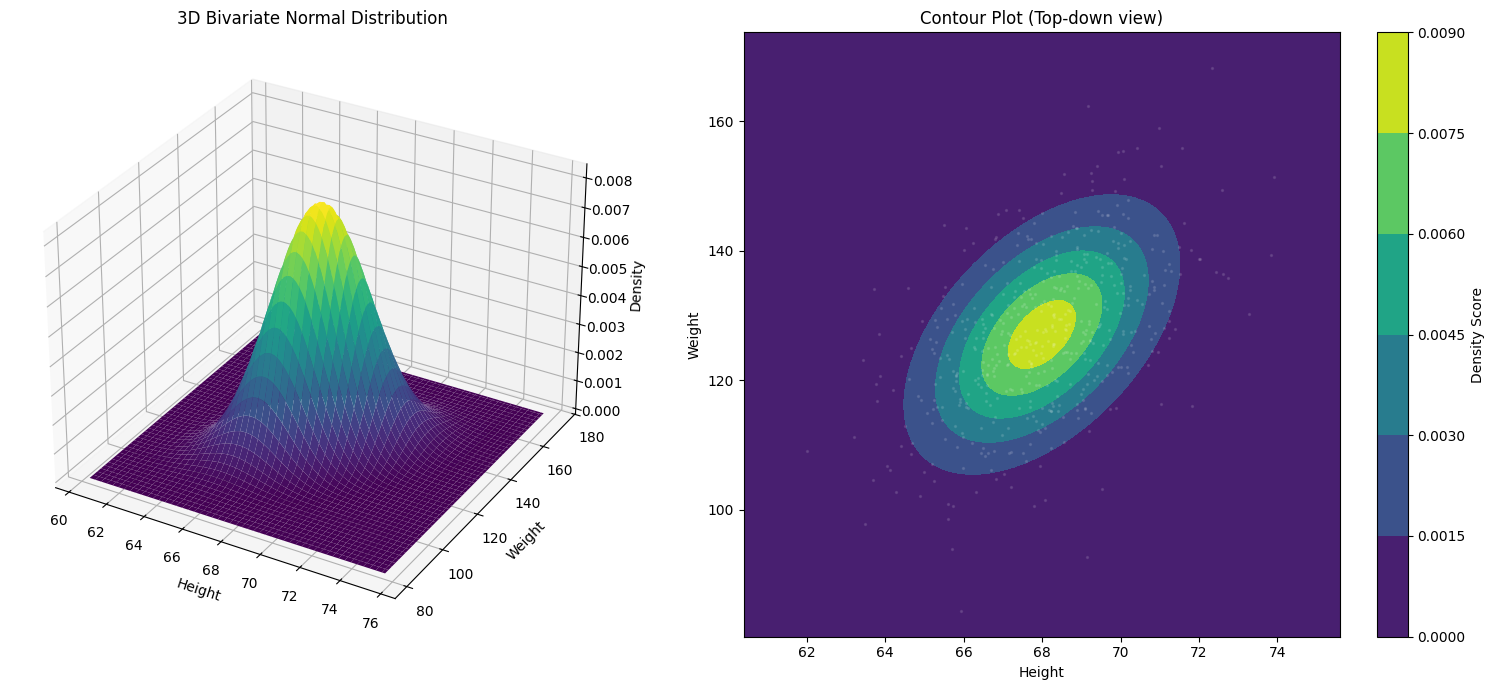

In [10]:
# --- STEP 5: VISUALIZE THE PDF ---
# Create a grid (graph paper) for smooth plotting
x_grid = np.linspace(mu_x - 4*std_x, mu_x + 4*std_x, 100)
y_grid = np.linspace(mu_y - 4*std_y, mu_y + 4*std_y, 100)
X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)

# Calculate the 'height' of our mountain for every point on the grid
Z_pdf = bvn_pdf_manual(X_mesh, Y_mesh, mu_x, mu_y, std_x, std_y, rho)

# Setup the figure
fig = plt.figure(figsize=(16, 7))

# A. 3D Surface Plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X_mesh, Y_mesh, Z_pdf, cmap='viridis', edgecolor='none')
ax1.set_title('3D Bivariate Normal Distribution')
ax1.set_xlabel('Height')
ax1.set_ylabel('Weight')
ax1.set_zlabel('Density')

# B. Contour Plot
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contourf(X_mesh, Y_mesh, Z_pdf, cmap='viridis')
plt.colorbar(contour, ax=ax2, label='Density Score')
ax2.set_title('Contour Plot (Top-down view)')
ax2.set_xlabel('Height')
ax2.set_ylabel('Weight')

# Overlay the actual data points to show they fit inside the ellipses
ax2.scatter(x[:500], y[:500], color='white', alpha=0.1, s=2)

plt.tight_layout()
plt.show()